In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../')
from src.utils.util import get_labedict

- ref: https://www.researchgate.net/figure/Evaluation-results-of-the-PASCAL-VOC-2012-test-set_tbl1_315635038

In [2]:
results_a = """Method Bkg Aero Bike Bird Boat Bottle Bus Car Cat Chair Cow
FCN-8s 91.2 76.8 34.2 68.9 49.4 60.3 75.3 74.7 77.6 21.4 62.5
FCN-GS 90.9 80.4 33.4 70.8 53.0 62.9 79.7 76.4 79.1 24.0 65.4
FCN-GS-v2 91.3 79.8 33.9 74.0 55.6 64.7 79.1 76.8 80.3 25.3 65.7
FCN-DBSCAN 91.2 82.2 33.1 73.3 55.6 63.3 79.8 76.1 78.3 24.5 64.8
FCN-DBSCAN-v2 92.0 78.5 32.4 76.9 56.6 64.6 80.6 74.7 77.8 26.7 68.4
DeepLab-CRF 92.1 78.4 33.1 78.2 55.6 65.3 81.3 75.5 78.6 25.3 69.2
DeepLab-CRF-GS 92.3 81.4 34.1 79.1 58.3 65.8 81.3 77.1 80.5 28.9 69.1
DeepLab-CRF-GS-v2 92.3 82.3 34.2 79.0 58.3 66.0 82.1 77.7 81.8 29.1 68.5"""

results_b = """Method Table Dog Horse Mbk Person Plant Sheep Sofa Train TV Mean
FCN-8s 46.8 71.8 63.9 76.5 73.9 45.2 72.4 37.4 70.9 55.1 62.2
FCN-GS 52.9 73.6 66.9 75.6 75.2 46.9 72.5 42.0 70.6 59.6 64.4
FCN-GS-v2 52.7 74.0 67.3 76.0 75.4 48.8 74.7 44.2 72.6 58.8 65.3
FCN-DBSCAN 53.6 73.9 66.6 76.9 75.0 47.6 73.2 43.4 73.2 59.0 65.0
FCN-DBSCAN-v2 52.1 73.6 68.6 78.4 76.8 54.0 76.9 46.1 72.2 57.3 65.9
DeepLab-CRF 52.7 75.2 69.0 79.1 77.6 54.7 78.3 45.1 73.3 56.2 66.4
DeepLab-CRF-GS 56.1 75.9 68.8 78.9 78.0 53.7 78.7 46.3 73.8 58.9 67.5
DeepLab-CRF-GS-v2 56.3 77.0 69.1 79.7 78.0 53.5 78.2 47.0 74.9 60.4 67.9"""

results_a = results_a.split('\n')
results_b = results_b.split('\n')
results_a = [i.split() for i in results_a]
results_b = [i.split() for i in results_b]

df_a = pd.DataFrame(results_a[1:], columns=results_a[0])
df_b = pd.DataFrame(results_b[1:], columns=results_b[0])

df_a = df_a.T
df_a.columns = df_a.iloc[0]
df_a = df_a.iloc[1:]

df_b = df_b.T
df_b.columns = df_b.iloc[0]
df_b = df_b.iloc[1:]

result_df = pd.concat([df_a,df_b])
result_df = result_df.astype(float)

In [3]:

labeldict = get_labedict()
label2num = labeldict['label2num']
num2label = labeldict['num2label']
labels = ['background']+list(label2num.keys())[:-2]

In [4]:

result_df.index = labels + ['mean']
train_df = pd.read_csv('./data/train_df.csv', index_col=0)

In [5]:
prop_cols = [i for i in train_df.columns if 'prop' in i]
prop_cols = [i for i in prop_cols if not ('background' in i) and not ('border' in i)]

sum_cols = [i for i in train_df.columns if 'sum' in i]
sum_cols = [i for i in sum_cols if not ('background' in i) and not ('border' in i)]



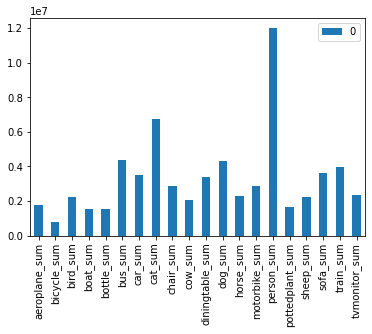

In [6]:
pd.DataFrame(train_df[sum_cols].sum()).plot(kind='bar')

/tmp/ipykernel_2018215/2781218084.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(train_df[prop_cols].mean()).plot(kind='bar')


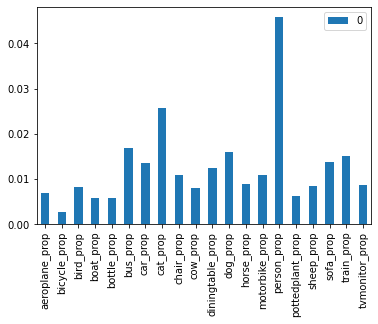

In [7]:
pd.DataFrame(train_df[prop_cols].mean()).plot(kind='bar')

In [8]:
result = result_df['DeepLab-CRF-GS-v2'].values[1:-1] # remove background, mean
prop_mean = train_df[prop_cols].mean().values # non-zero mean
pix_sum = train_df[sum_cols].sum()


/tmp/ipykernel_2018215/1144298511.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  prop_mean = train_df[prop_cols].mean().values # non-zero mean


In [9]:
data = np.array([result, list(prop_mean)])
def calc_corr(a, b):
    cov = np.cov(a, b, ddof=len(a)-1)
    a_sd = np.std(a, ddof=len(a)-1)
    b_sd = np.std(b, ddof=len(b)-1)
    return (cov/(a_sd * b_sd))
print(np.corrcoef(data[0][1]))
print(calc_corr(result, list(prop_mean))[0][1])

nan
0.3547779709489876


/home/nys/anaconda3/envs/my_env/lib/python3.8/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/nys/anaconda3/envs/my_env/lib/python3.8/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/nys/anaconda3/envs/my_env/lib/python3.8/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [10]:
data = np.array([result, pix_sum])
print(np.corrcoef(data[0][1]))
print(calc_corr(result, list(pix_sum))[0][1])

nan
0.35282429194321757


In [23]:
result_df.to_csv('./data/previous_results.csv')

In [27]:
result_df = pd.read_csv('./data/previous_results.csv', index_col=0)


- todo
    - check confidence interval on correlation coef.
    - t-test on correlation coef.